In [95]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import *
import scipy as sp

In [96]:
from sklearn import datasets

In [97]:
iris =  datasets.load_iris()

In [98]:
X = iris.data[:,:2]
y = iris.target

In [99]:
#now we will split the data into training and testing data
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.3, random_state=42)

In [100]:
X.shape

(150, 2)

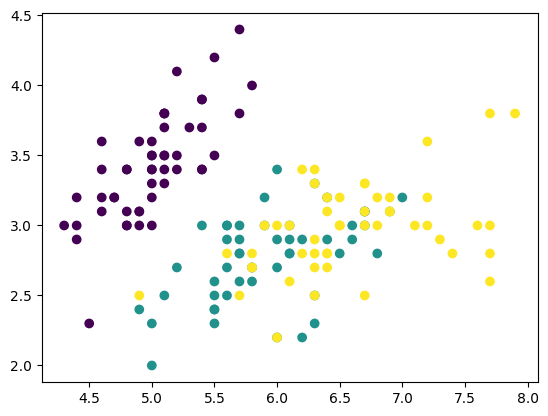

In [101]:
X_reduced = X[:,:2]
plt.scatter(X_reduced[:,0], X_reduced[:,1], c=y)

In [102]:
## now we will run the SVM classifier on the data
clf = svm.SVC(kernel='linear', C=1).fit(X_train, y_train)
clf.score(X_test, y_test)

0.8

In [103]:
# polynomial kernel based svm
clf = svm.SVC(kernel='poly', degree=2, C=1).fit(X_train, y_train)
clf.score(X_test, y_test)

0.7333333333333333

In [104]:
# rbf kernel based svm
clf = svm.SVC(kernel='rbf', gamma=0.1, C=1).fit(X_train, y_train)
clf.score(X_test, y_test)


0.8

In [105]:
# plot the decision boundary
def plot_decision_boundary(clf, X, y):
    # Set min and max values and give it some padding
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole gid
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral)
    plt.show()

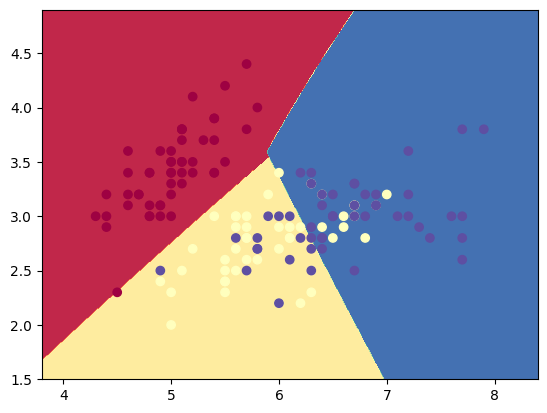

In [106]:
plot_decision_boundary(clf, X_reduced, y)

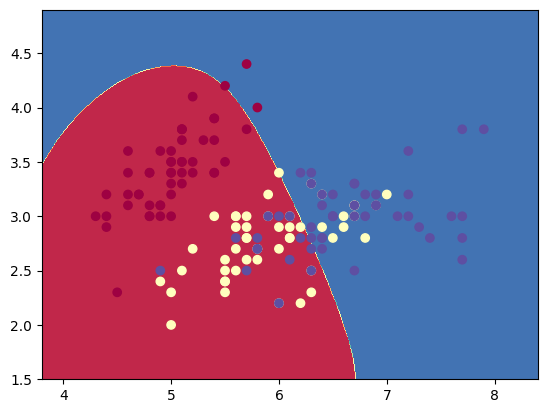

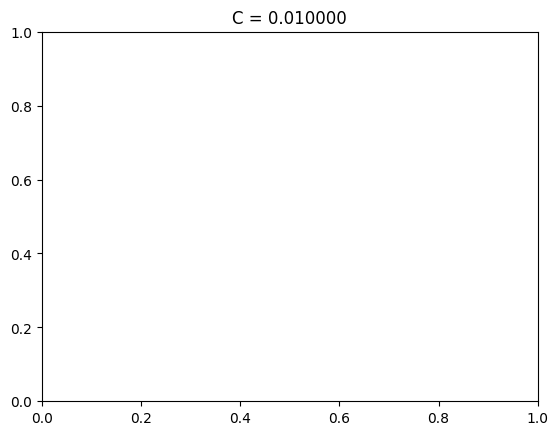

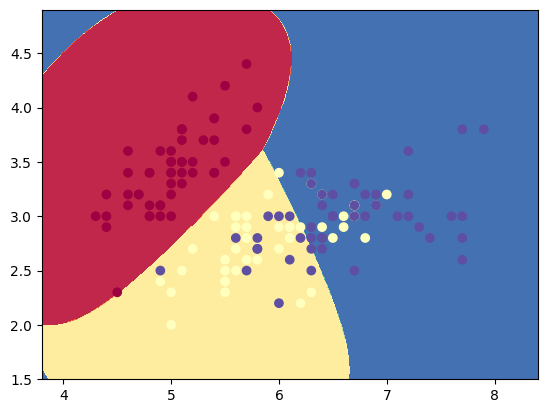

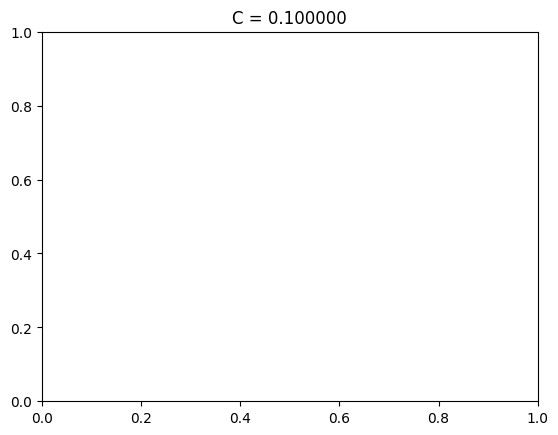

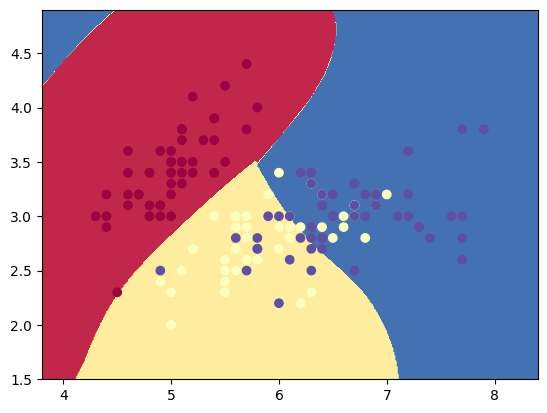

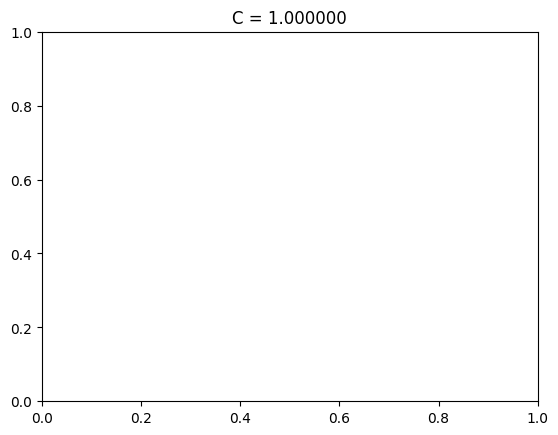

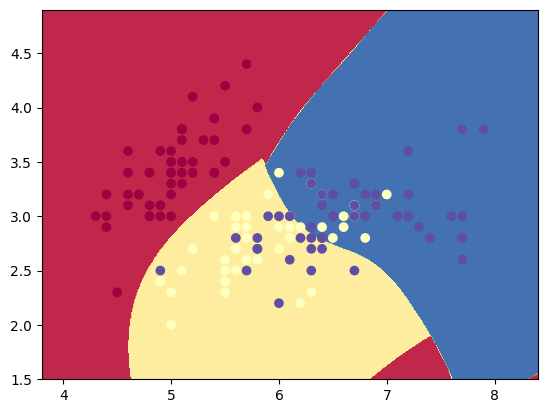

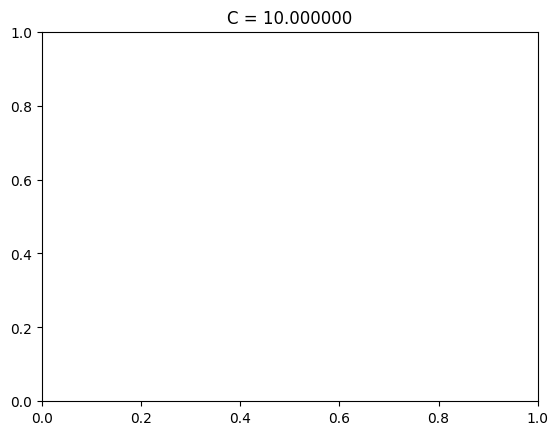

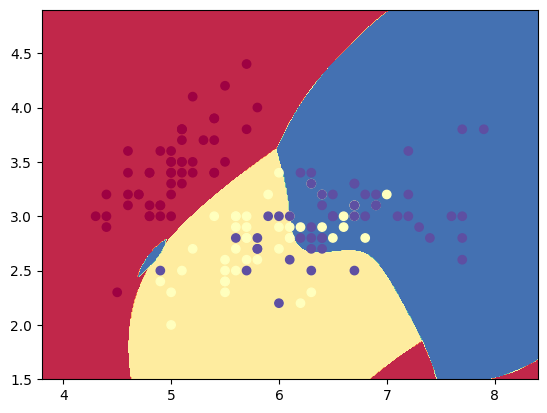

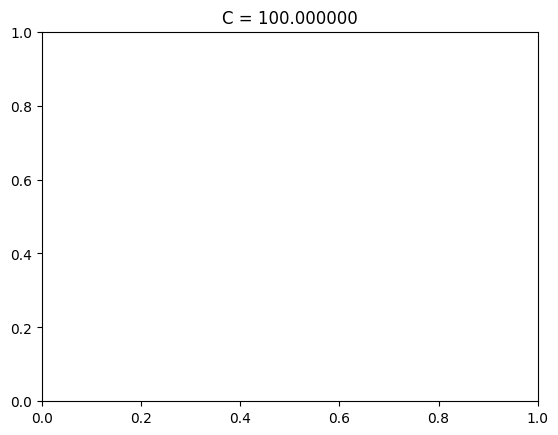

In [107]:
# now we run this for different values of C and make subplots
# fig, axes = plt.subplots(1, 5, figsize=(15, 5))
for C in [0.01, 0.1, 1, 10, 100]:
    clf = svm.SVC(kernel='rbf', gamma=1, C=C).fit(X_train, y_train)
    plot_decision_boundary(clf, X_reduced, y)
    plt.title('C = %f' % C)
    plt.show()
#     ax.set_title('C = %s' % C)
# print("done")


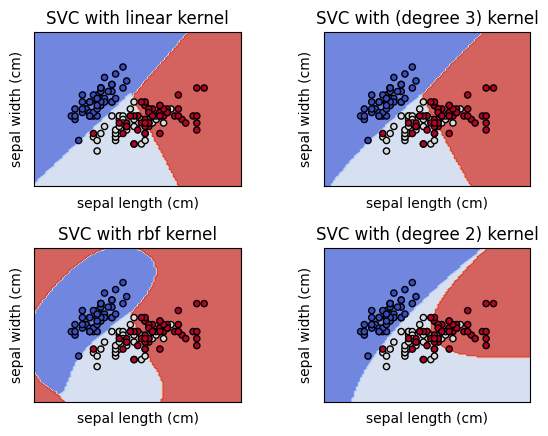

In [108]:
from sklearn.inspection import DecisionBoundaryDisplay
C = 1.0  # SVM regularization parameter
models = (
    svm.SVC(kernel="linear", C=C),
    svm.SVC(kernel="poly", degree=2, C=C),
    svm.SVC(kernel="rbf", gamma=1, C=C),
    svm.SVC(kernel="poly", degree=3, gamma="auto", C=C),
)
models = (clf.fit(X, y) for clf in models)

# title for the plots
titles = (
    "SVC with linear kernel",
    # "SVC with RBF kernel",
    "SVC with (degree 3) kernel",
    "SVC with rbf kernel",
    "SVC with (degree 2) kernel"
)

# Set-up 2x2 grid for plotting.
fig, sub = plt.subplots(2, 2)
plt.subplots_adjust(wspace=0.4, hspace=0.4)

X0, X1 = X[:, 0], X[:, 1]

for clf, title, ax in zip(models, titles, sub.flatten()):
    disp = DecisionBoundaryDisplay.from_estimator(
        clf,
        X,
        response_method="predict",
        cmap=plt.cm.coolwarm,
        alpha=0.8,
        ax=ax,
        xlabel=iris.feature_names[0],
        ylabel=iris.feature_names[1],
    )
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors="k")
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)

plt.show()

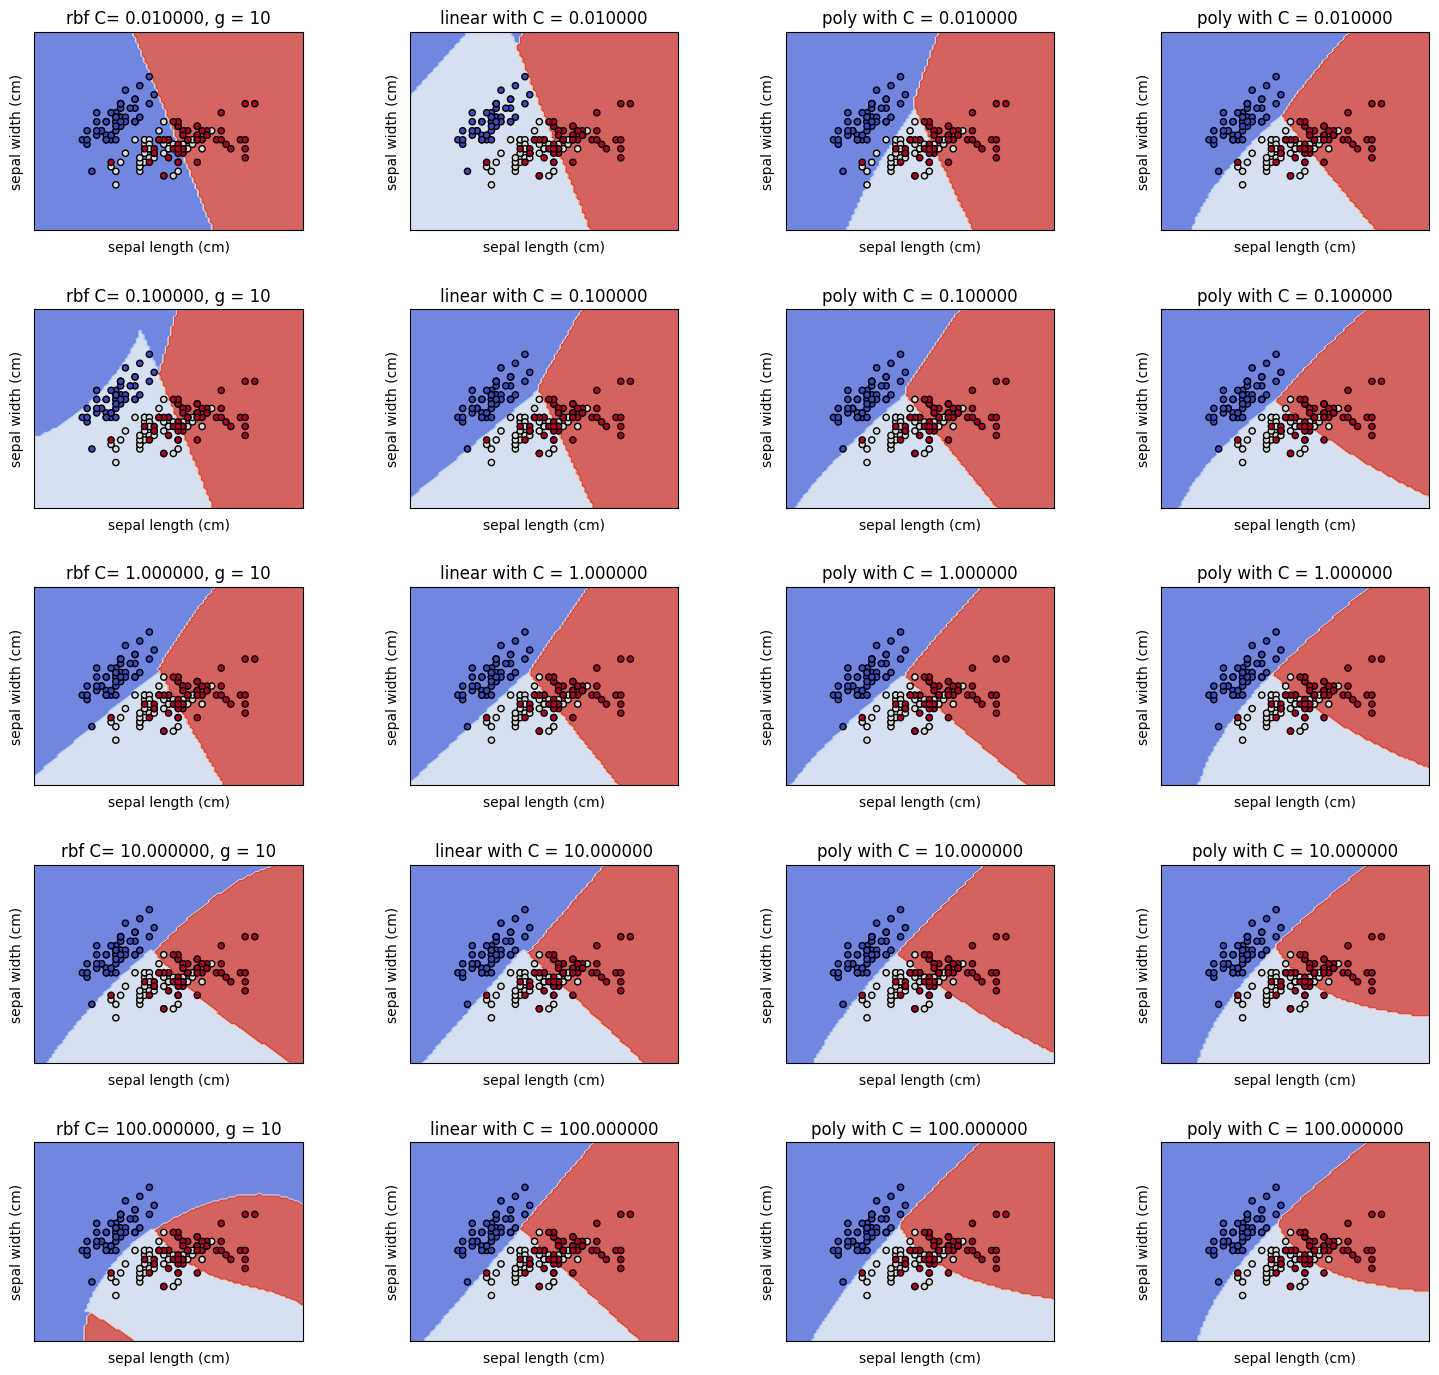

In [111]:
C_vals = [0.01, 0.1, 1, 10, 100]
fig, sub = plt.subplots(5, 4, figsize=(18, 17))
models = []
titles = []
plt.subplots_adjust(wspace=0.4, hspace=0.4)
for C in C_vals:
    models.append(svm.SVC(kernel="rbf", gamma=0.1, C=C).fit(X_train, y_train))
    titles.append("rbf C= %f, g = 10" % C)
    models.append(svm.SVC(kernel="linear", C=C).fit(X_train, y_train))
    titles.append("linear with C = %f" % C)
    models.append(svm.SVC(kernel="poly", degree=2, C=C).fit(X_train, y_train))
    titles.append("poly with C = %f" % C)
    models.append(svm.SVC(kernel="poly", degree=3, C=C).fit(X_train, y_train))
    titles.append("poly with C = %f" % C)

X0, X1 = X[:, 0], X[:, 1]

for clf, title, ax in zip(models, titles, sub.flatten()):
    disp = DecisionBoundaryDisplay.from_estimator(
        clf,
        X,
        response_method="predict",
        cmap=plt.cm.coolwarm,
        alpha=0.8,
        ax=ax,
        xlabel=iris.feature_names[0],
        ylabel=iris.feature_names[1],
    )
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors="k")
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)

plt.show()